# From RGB colorspace to HSV colorspace

HSV colorspace are one of two most common cylindrical-coordinate representations of points in an RGB color model.
In HSV colorspace, HSV stands for hue, saturation, and value.
In this notebook, we try to convert satellite images from RGB colorspace to HSV colorspace.
And then try to extract part of the image which can represent the building in the image well.

In [110]:
import colorsys
import tifffile as tiff
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

Show HSV.

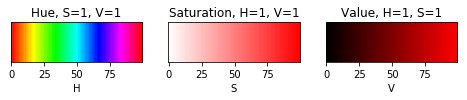

In [111]:
h0 = np.linspace(0,1,100)
s0 = 1 * np.ones(100)
v0 = 1 * np.ones(100)
rgb0 = np.ndarray([30,100,3])
for i in range(100):
    rgb = colorsys.hsv_to_rgb(h0[i],s0[i],v0[i])
    rgb0[:,i,0] = rgb[0]
    rgb0[:,i,1] = rgb[1]
    rgb0[:,i,2] = rgb[2]
    
s1 = np.linspace(0,1,100)
h1 = 1 * np.ones(100)
v1 = 1 * np.ones(100)
rgb1 = np.ndarray([30,100,3])
for i in range(100):
    rgb = colorsys.hsv_to_rgb(h1[i],s1[i],v1[i])
    rgb1[:,i,0] = rgb[0]
    rgb1[:,i,1] = rgb[1]
    rgb1[:,i,2] = rgb[2]
    
v2 = np.linspace(0,1,100)
s2 = 1 * np.ones(100)
h2 = 1 * np.ones(100)
rgb2 = np.ndarray([30,100,3])
for i in range(100):
    rgb = colorsys.hsv_to_rgb(h2[i],s2[i],v2[i])
    rgb2[:,i,0] = rgb[0]
    rgb2[:,i,1] = rgb[1]
    rgb2[:,i,2] = rgb[2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=[8,2])
ax0.imshow(rgb0)
ax0.set_title("Hue, S=1, V=1")
ax0.set_xlabel('H')
ax0.set_yticks([])

ax1.imshow(rgb1)
ax1.set_title('Saturation, H=1, V=1')
ax1.set_xlabel('S')
ax1.set_yticks([])

ax2.imshow(rgb2)
ax2.set_title('Value, H=1, S=1')
ax2.set_xlabel('V')
ax2.set_yticks([])

fig.savefig('./image_data/hsv.pdf')

Transform tiff file to a regular 3-dimensional matrix in computer.

In [112]:
def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 0, axis=0)
    maxs = np.percentile(matrix, 100, axis=0) - mins
    matrix = (matrix - mins[None, :]) / (maxs[None, :])
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

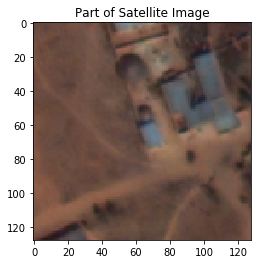

In [113]:
I = tiff.imread('./image_data/6030_2_1.tif').transpose([1,2,0])
im_rgb = scale_percentile(I)

I1 = im_rgb[1520:1520+128, 2550:2550+128]
plt.imshow(I1)
plt.title('Part of Satellite Image')

## From RGB colorspace to HSV colorspace

In [114]:
I2 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        hsv = colorsys.rgb_to_hsv(I1[i,j,0],I1[i,j,1],I1[i,j,2])
        I2[i,j,0] = hsv[0]
        I2[i,j,1] = hsv[1]
        I2[i,j,2] = hsv[2]

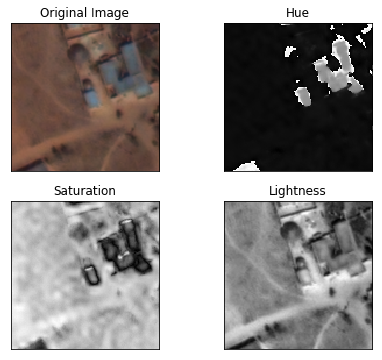

In [115]:
fig, axes = plt.subplots(2, 2, figsize=[7,6])
axes[0,0].imshow(I1)
axes[0,0].set_title("Original Image")
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(I2[:,:,0], cmap='gray')
axes[0,1].set_title('Hue')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[1,0].imshow(I2[:,:,1], cmap='gray')
axes[1,0].set_title('Saturation')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(I2[:,:,2], cmap='gray')
axes[1,1].set_title('Lightness')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

fig.savefig('./image_data/hsv_image1.pdf')

We can see that the saturation image discribe the building outline well.

## From HSV colorspace to RGB colorspace

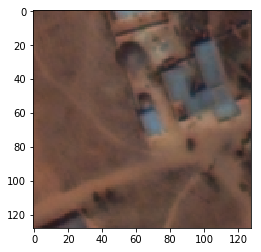

In [116]:
I3 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        rgb = colorsys.hsv_to_rgb(I2[i,j,0],I2[i,j,1],I2[i,j,2])
        I3[i,j,0] = rgb[0]
        I3[i,j,1] = rgb[1]
        I3[i,j,2] = rgb[2]
plt.imshow(I3)

## Try to Extract Roof Color
Make the color except building roof lightness be 50%.

In [117]:
I2[40,80]

array([ 0.59430708,  0.07784431,  0.38961039])

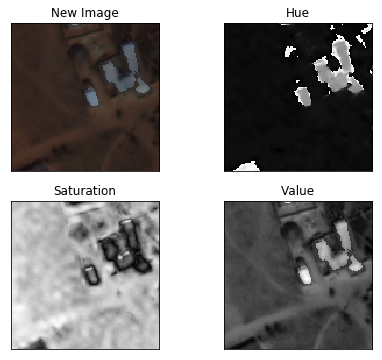

In [118]:
I2[:,:,2][np.where((I2[:,:,0] < 0.4))] = 0.5 * I2[:,:,2][np.where((I2[:,:,0] < 0.4))]
I2[:,:,2][np.where((I2[:,:,0] > 0.8))] = 0.5 * I2[:,:,2][np.where((I2[:,:,0] > 0.8))]

I3 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        rgb = colorsys.hsv_to_rgb(I2[i,j,0],I2[i,j,1],I2[i,j,2])
        I3[i,j,0] = rgb[0]
        I3[i,j,1] = rgb[1]
        I3[i,j,2] = rgb[2]
        
# I2[:,:,2][np.where((I2[:,:,0]<0.1))] = 0.5 * I2[:,:,2][np.where((I2[:,:,0] < 0.1))]
fig, axes = plt.subplots(2, 2, figsize=[7,6])
axes[0,0].imshow(I3)
axes[0,0].set_title("New Image")
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(I2[:,:,0], cmap='gray')
axes[0,1].set_title('Hue')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[1,0].imshow(I2[:,:,1], cmap='gray')
axes[1,0].set_title('Saturation')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(I2[:,:,2], cmap='gray')
axes[1,1].set_title('Value')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

fig.savefig('./image_data/hsv_image2.pdf')

Make the yellow road lightness be 50%.

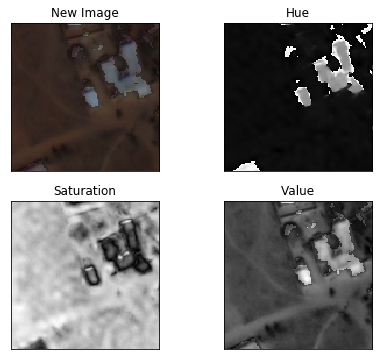

In [119]:
I2 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        hsv = colorsys.rgb_to_hsv(I1[i,j,0],I1[i,j,1],I1[i,j,2])
        I2[i,j,0] = hsv[0]
        I2[i,j,1] = hsv[1]
        I2[i,j,2] = hsv[2]

I2[:,:,2][np.where((I2[:,:,0]<0.1))] = 0.5 * I2[:,:,2][np.where((I2[:,:,0] < 0.1))]
I3 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        rgb = colorsys.hsv_to_rgb(I2[i,j,0],I2[i,j,1],I2[i,j,2])
        I3[i,j,0] = rgb[0]
        I3[i,j,1] = rgb[1]
        I3[i,j,2] = rgb[2]
        

fig, axes = plt.subplots(2, 2, figsize=[7,6])
axes[0,0].imshow(I3)
axes[0,0].set_title("New Image")
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(I2[:,:,0], cmap='gray')
axes[0,1].set_title('Hue')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[1,0].imshow(I2[:,:,1], cmap='gray')
axes[1,0].set_title('Saturation')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(I2[:,:,2], cmap='gray')
axes[1,1].set_title('Value')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

fig.savefig('./image_data/hsv_image3.pdf')

Make the saturation larger than 0.15 part value be 50%.

In [120]:
I2[60,25,1]

0.41277134417928646

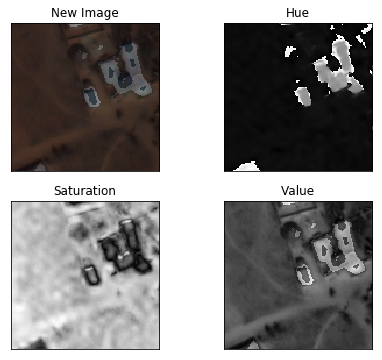

In [121]:
I2 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        hsv = colorsys.rgb_to_hsv(I1[i,j,0],I1[i,j,1],I1[i,j,2])
        I2[i,j,0] = hsv[0]
        I2[i,j,1] = hsv[1]
        I2[i,j,2] = hsv[2]

I2[:,:,2][np.where((I2[:,:,1] > 0.15))] = 0.5 * I2[:,:,2][np.where((I2[:,:,1] > 0.15))]
I3 = np.ndarray([128,128,3])
for i in range(128):
    for j in range(128):
        rgb = colorsys.hsv_to_rgb(I2[i,j,0],I2[i,j,1],I2[i,j,2])
        I3[i,j,0] = rgb[0]
        I3[i,j,1] = rgb[1]
        I3[i,j,2] = rgb[2]
        

fig, axes = plt.subplots(2, 2, figsize=[7,6])
axes[0,0].imshow(I3)
axes[0,0].set_title("New Image")
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])

axes[0,1].imshow(I2[:,:,0], cmap='gray')
axes[0,1].set_title('Hue')
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])

axes[1,0].imshow(I2[:,:,1], cmap='gray')
axes[1,0].set_title('Saturation')
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])

axes[1,1].imshow(I2[:,:,2], cmap='gray')
axes[1,1].set_title('Value')
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])

fig.savefig('./image_data/hsv_image4.pdf')